In [1]:
pip install pandas seaborn matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("C:/Users/DynaBook/Downloads/archive (10)/testdata.manual.2009.06.14.csv", encoding='ISO-8859-1', header=None)
# Rename the columns for clarity
df.columns = ['Polarity', 'Tweet_ID', 'Date', 'Query', 'User', 'Tweet_Text']
# Display first few rows of the dataset
print(df.head())


   Polarity  Tweet_ID                          Date    Query      User  \
0         4         3  Mon May 11 03:17:40 UTC 2009  kindle2    tpryan   
1         4         4  Mon May 11 03:18:03 UTC 2009  kindle2    vcu451   
2         4         5  Mon May 11 03:18:54 UTC 2009  kindle2    chadfu   
3         4         6  Mon May 11 03:19:04 UTC 2009  kindle2     SIX15   
4         4         7  Mon May 11 03:21:41 UTC 2009  kindle2  yamarama   

                                          Tweet_Text  
0  @stellargirl I loooooooovvvvvveee my Kindle2. ...  
1  Reading my kindle2...  Love it... Lee childs i...  
2  Ok, first assesment of the #kindle2 ...it fuck...  
3  @kenburbary You'll love your Kindle2. I've had...  
4  @mikefish  Fair enough. But i have the Kindle2...  


In [3]:
# Check the distribution of sentiment labels(0 = negative, 2 = neutral, 4 = positive)
print(df['Polarity'].value_counts())


Polarity
4    198
0    178
2    140
Name: count, dtype: int64


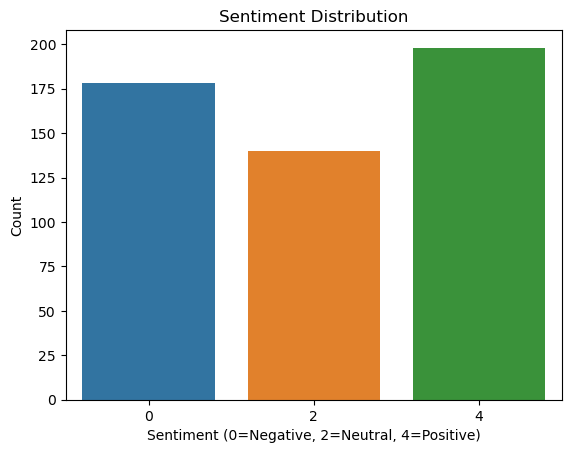

In [4]:
# Polarity distribution
sns.countplot(x='Polarity', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0=Negative, 2=Neutral, 4=Positive)')
plt.ylabel('Count')
plt.show()


In [5]:
import re
def clean_text(text):
    """Cleans the tweet text."""
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text
# Apply text cleaning
df['Cleaned_Tweet'] = df['Tweet_Text'].apply(clean_text)
# Display cleaned tweets
print(df[['Tweet_Text', 'Cleaned_Tweet']].head())

                                          Tweet_Text  \
0  @stellargirl I loooooooovvvvvveee my Kindle2. ...   
1  Reading my kindle2...  Love it... Lee childs i...   
2  Ok, first assesment of the #kindle2 ...it fuck...   
3  @kenburbary You'll love your Kindle2. I've had...   
4  @mikefish  Fair enough. But i have the Kindle2...   

                                       Cleaned_Tweet  
0   i loooooooovvvvvveee my kindle2 not that the ...  
1  reading my kindle2  love it lee childs is good...  
2        ok first assesment of the  it fucking rocks  
3   youll love your kindle2 ive had mine for a fe...  
4    fair enough but i have the kindle2 and i thi...  


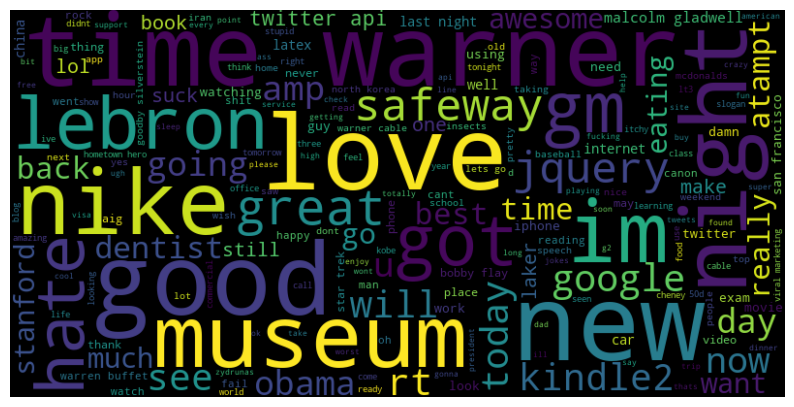

In [6]:
#A word cloud is a visual representation of the most frequent words in the dataset.
#The larger the word, the more frequently it appears in the text.
from wordcloud import WordCloud
# Combine all cleaned tweets
all_words = ' '.join([text for text in df['Cleaned_Tweet']])
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)
# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
# Map the polarity to readable sentiment
df['Sentiment'] = df['Polarity'].map({0: 'Negative', 2: 'Neutral', 4: 'Positive'})

# Display a sample of the tweets with sentiment
print(df[['Cleaned_Tweet', 'Sentiment']].head(10))


                                       Cleaned_Tweet Sentiment
0   i loooooooovvvvvveee my kindle2 not that the ...  Positive
1  reading my kindle2  love it lee childs is good...  Positive
2        ok first assesment of the  it fucking rocks  Positive
3   youll love your kindle2 ive had mine for a fe...  Positive
4    fair enough but i have the kindle2 and i thi...  Positive
5   no it is too big im quite happy with the kindle2  Positive
6  fuck this economy i hate aig and their non loa...  Negative
7                       jquery is my new best friend  Positive
8                                      loves twitter  Positive
9  how can you not love obama he makes jokes abou...  Positive


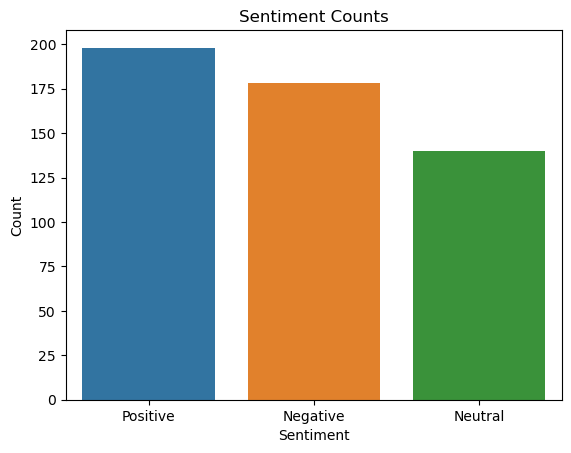

In [10]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
